
# Basic vector processing: GeoPandas

## What is GeoPandas?
GeoPandas is an open source library used for geospatial data. It extends datatypes used by pandas
library for geometric and spatial data.

## Import geopandas library

## Reading files
GeoPandas can read file containing a data and a geometry (GeoJSON, Shapefile).

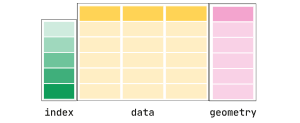

In [2]:
import geopandas as gpd

In [3]:
gdf = gpd.read_file("src/qc_facilities.geojson")
gdf.head()

,Name,Status,District,Barangay,Code,CF Type,Level,Type Own,Lvl Offer,Class,Other Serv,Bed Capaci,Group,Classifica,Category,Phone Fax,BEIS ID,Levels,geometry
0,San Vicente Barangay Hall,Permanent,4,San Vicente,04107BH1,Barangay,None,None,None,None,None,NaN,None,None,None,None,None,None,POINT (121.05676 14.65313)
1,Old Capitol Site Barangay Hall,Permanent,4,Old Capitol Site,04076BH1,Barangay,None,None,None,None,None,NaN,None,None,None,None,None,None,POINT (121.05504 14.65206)
2,Central Barangay Hall,Permanent (situated at govt property),4,Central,04022BH1,Barangay,None,None,None,None,None,NaN,None,None,None,None,None,None,POINT (121.05154 14.64575)
3,U. P. Village Barangay Hall,Permanent,4,U. P. Village,04133BH1,Barangay,None,None,None,None,None,NaN,None,None,None,None,None,None,POINT (121.05834 14.64760)
4,Pinyahan Barangay Hall,Permanent,4,Pinyahan,04088BH1,Barangay,None,None,None,None,None,NaN,None,None,None,None,None,None,POINT (121.04717 14.63433)



## Visualization of vector data

The geopandas use `plot` function, which is imported from [matplotlib pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) library, which helps us to visualize the data in nice format. If the column name is specified, the plot coloring will be based on the values in that column. 

/srv/conda/envs/notebook/lib/python3.10/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


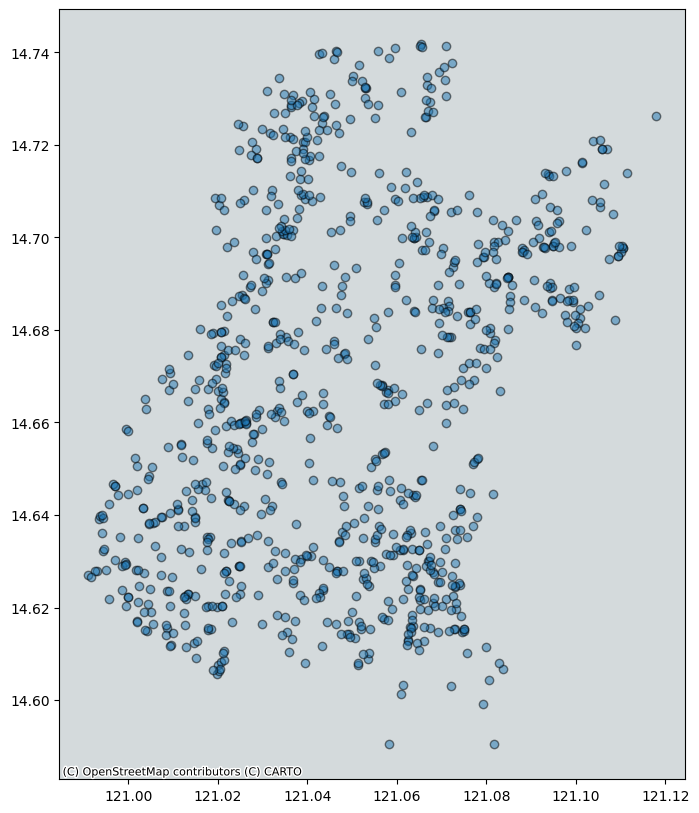

In [4]:
import contextily as ctx
import matplotlib.pyplot as plt

if gdf.crs.to_string() != 'EPSG:3857':
    gdf = gdf.to_crs(epsg=4326)  

# plotting the geodataframe for visualization
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')  # Adjust transparency and edge color

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.show()

## Read some additional information
Lets try to get the more information of the shapefile in this section.

In [5]:
# How many provience are there?
num_of_crit_fac = len(gdf)
print("Nuber of critical facilities: ", num_of_crit_fac)
print("----------------------------------------------------------------------------------------------------")

# What is the coordinate system of the data?
crs = gdf.crs
print("Projection of data: ", crs)
print("----------------------------------------------------------------------------------------------------")

# what is the geometry type of data?
geom_type = set(gdf.geom_type)
print("Geometry of data: ", geom_type)
print("----------------------------------------------------------------------------------------------------")

Nuber of critical facilities:  928
----------------------------------------------------------------------------------------------------
Projection of data:  EPSG:4326
----------------------------------------------------------------------------------------------------
Geometry of data:  {'Point'}
----------------------------------------------------------------------------------------------------


## Working with attribute table
By using geopandas, we can filter, edit and save the data as a new file. In this section we are going to explore it. First of all, lets try to get the structure of the data

                             Name                                 Status  \
0       San Vicente Barangay Hall                              Permanent   
1  Old Capitol Site Barangay Hall                              Permanent   
2           Central Barangay Hall  Permanent (situated at govt property)   
3     U. P. Village Barangay Hall                              Permanent   
4          Pinyahan Barangay Hall                              Permanent   

  District          Barangay      Code   CF Type Level Type Own Lvl Offer  \
0        4       San Vicente  04107BH1  Barangay  None     None      None   
1        4  Old Capitol Site  04076BH1  Barangay  None     None      None   
2        4           Central  04022BH1  Barangay  None     None      None   
3        4     U. P. Village  04133BH1  Barangay  None     None      None   
4        4          Pinyahan  04088BH1  Barangay  None     None      None   

  Class Other Serv  Bed Capaci Group Classifica Category Phone Fax BEIS ID  \
0 

<Axes: >

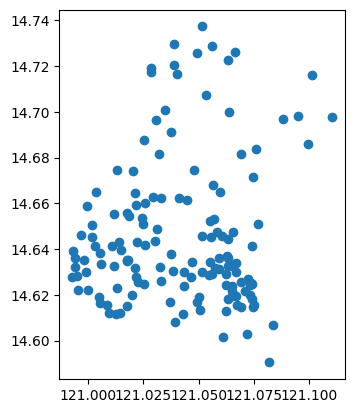

In [6]:
#Filtering a specific column with a specific value
filtered_gdf1 = gdf[gdf['CF Type'] == 'Barangay']
print(filtered_gdf1.head())
filtered_gdf1.plot()

## Access GeoDataFrame Values
Similar to pandas, we can also use iterrows() to iterate rows in a GeoDataFrame

<Axes: >

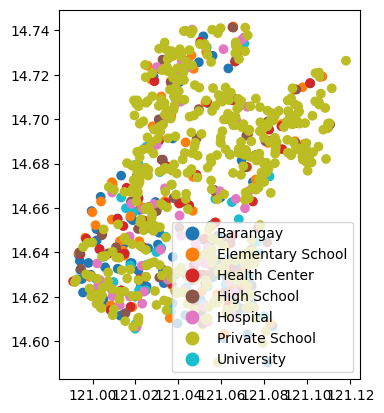

In [7]:
# for index, row in gdf.iterrows():
#     print(row['CF Type'])
gdf.plot('CF Type', legend=True)


## Projections
### Identify CRS/Projection
Coordinate reference system defines a two-dimensional projected in map relates to real places on earth

In [8]:
crs = gdf.crs
print(crs)

EPSG:4326



### Re-projecting
To change the representation of locations from coordinate system to another.

In [9]:
crs_32651 = gdf.to_crs('EPSG:32651')
print(crs_32651.crs)

EPSG:32651



### Working with geometries (Vector operations)
In this section, we are going to work with the geometric operations.

In [10]:
gdf_2 = gpd.read_file("src/qc_muni_bounds.geojson")
gdf_to_crs_32651 = gdf_2.to_crs('EPSG:32651')
gdf_2["area"] = gdf_to_crs_32651.geometry.area / 10**6
print(gdf_2)

    PHCode_Reg                       Reg_Name   PHCode_Pro  \
0  PH130000000  NATIONAL CAPITAL REGION (NCR)  PH137400000   

              Pro_Name   PHCode_Mun     Mun_Name     Province     MuniCity  \
0  METROPOLITAN MANILA  PH137404000  QUEZON CITY  MetroManila  Quezon City   

                                            geometry        area  
0  MULTIPOLYGON (((121.13497 14.77673, 121.13447 ...  162.484613  


## Working with geometries (Vector operations)
In this section, we are going to work with the geometric operations.

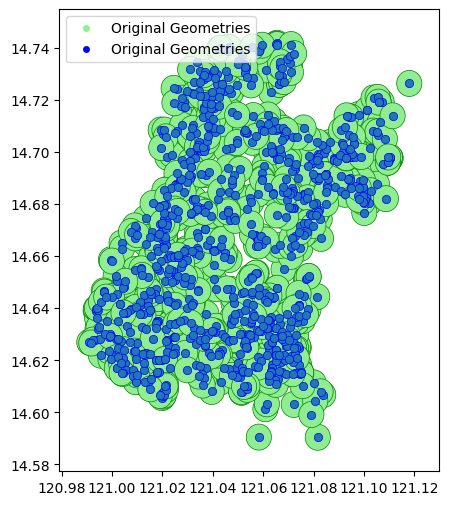

In [24]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Geometry is in a geographic CRS")

# Create a buffer around each country's geometry
gdf_copy = gdf.copy()
gdf_copy['geometry'] = gdf_copy['geometry'].buffer(0.005)

# Plot both the original and buffered geometries
fig, ax = plt.subplots(figsize=(10, 6))

# Plot buffered geometries
gdf_copy.plot(ax=ax, edgecolor='green', color='lightgreen', linewidth=0.5)
# Plot original geometries
gdf.plot(ax=ax, edgecolor='blue', linewidth=0.5)

buffer_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=6, label='Original Geometries')
original_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=6, label='Original Geometries')

# Add custom legend
ax.legend(handles=[buffer_patch, original_patch], loc='upper left')
plt.show()


## Intersection
Intersection in GeoPandas returns geometries that are aligned by both GeoDataFrames.

<Axes: >

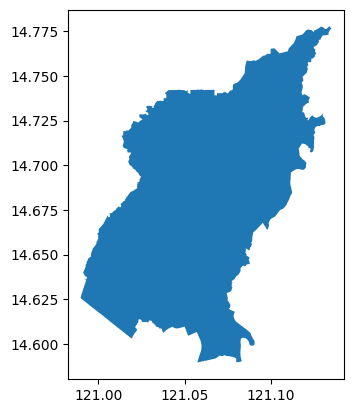

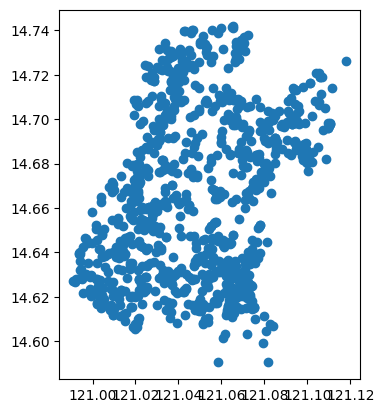

In [25]:
gdf_2 = gpd.read_file("src/qc_muni_bounds.geojson")
gdf_2.plot()
intersection = gpd.overlay(gdf, gdf_2, how='intersection')
# print(intersection)
intersection.plot()


## Clipping
Clipping in GeoPandas lets you clip a set of vector geometries to another vector object.

     id                                           geometry
0  None  MULTIPOINT (121.02851 14.66182, 121.02988 14.6...


<Axes: >

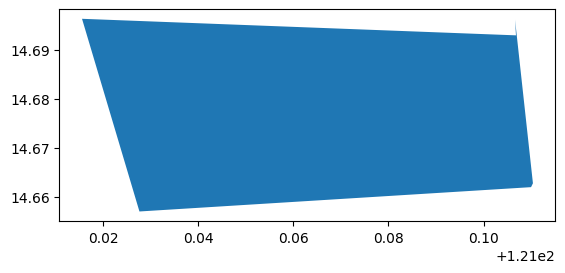

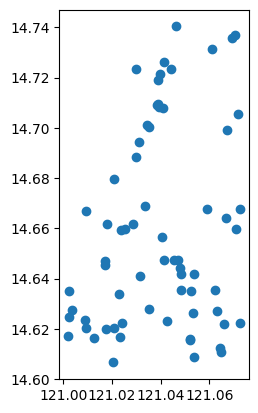

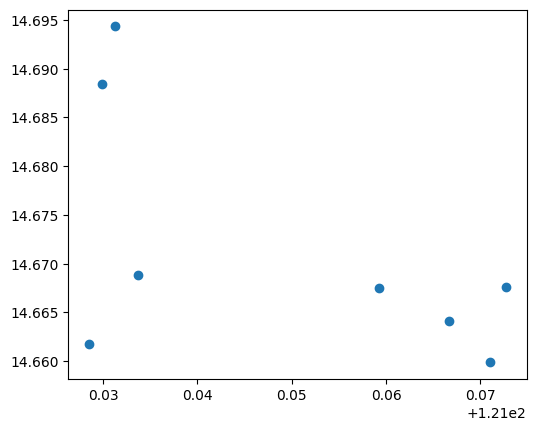

In [26]:
sample_shp = gpd.read_file("src/sample_poly.shp")
sample_shp.plot()

hospitals = gdf[gdf["CF Type"] == "Hospital"]
hospitals.plot()

new_hosp = sample_shp.clip(hospitals)
print(new_hosp)
new_hosp.plot()


## Dissolving
Dissolving in GeoPandas dissolves geometries and groups it into single geometry feature.

In [27]:
dissolved = gdf.dissolve('CF Type')
dissolved.head()
# dissolved.plot()

,geometry,Name,Status,District,Barangay,Code,Level,Type Own,Lvl Offer,Class,Other Serv,Bed Capaci,Group,Classifica,Category,Phone Fax,BEIS ID,Levels
CF Type,,,,,,,,,,,,,,,,,,
Barangay,"MULTIPOINT (120.99305 14.62785, 120.99348 14.6...",San Vicente Barangay Hall,Permanent,4,San Vicente,04107BH1,None,None,None,None,None,NaN,None,None,None,None,None,None
Elementary School,"MULTIPOINT (120.99357 14.63983, 120.99667 14.6...",Ramon Magsaysay Elementary School,None,1,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None
Health Center,"MULTIPOINT (120.99096 14.62695, 120.99435 14.6...",Holy Spirit Health Center,None,2,None,None,None,None,None,Regular HC,Microscopy Center,NaN,None,None,None,None,None,None
High School,"MULTIPOINT (120.99402 14.64005, 120.99461 14.6...",Batasan National High School,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None
Hospital,"MULTIPOINT (121.00191 14.61707, 121.00224 14.6...",Veterans Memorial Medical Center,None,1,None,None,None,None,None,None,None,766.0,Public,Tertiary,General,None,None,None
